In [1]:
import os
import pandas as pd

In [2]:
data_path="./data/"
filename = data_path+'diabetes.csv' 
dataset = pd.read_csv(filename,header=None)

In [3]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Normalize Data**

Normalization is usefu in some machine learning algorithms when your time series data has input values with differing scales.It may be required for algorithms, like k-Nearest neighbors, which uses distance calculations and Linear Regression and Artificial Neural Networks that weight input values.

In [4]:
dataset_copy=dataset.copy(deep=True)
for feature in dataset.columns:
    dataset_copy[feature]=(dataset[feature]-dataset[feature].min())/(dataset[feature].max()-dataset[feature].min())

In [5]:
dataset_copy.head(10)

,0,1,2,3,4,5,6,7,8
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.0
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,1.0
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0.0
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,1.0
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000,1.0


In [6]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**FINANCIAL NORMALIZATION**

In [7]:
import numpy as np
import datetime
import time
import re
import pandas as pd
import requests

 
pair = 'btcusd'
exchange = 'kraken'
url="https://api.cryptowat.ch/markets/{}/{}/ohlc?after=1000000000&periods=86400".format(exchange, pair)
print(url)

requestHeaders={'Prefer':'respond-async','Content-Type':'application/json'}
resp = requests.get(url, headers=requestHeaders,  verify=False)
resp = resp.json()
resp = resp["result"]["86400"]
 
all_candles = []
for c in resp:
    all_candles.append({"Date": time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime(c[0])), "Open": float(c[1]), "High": float(c[2]), "Low": float(c[3]), "Close": float(c[4]), "Volume": float(c[5])})
 
df = pd.DataFrame(all_candles)
df = df.set_index(["Date"])
df = df[["Open", "High", "Low", "Close", "Volume"]]
df.to_csv("bitcoin.csv")


https://api.cryptowat.ch/markets/kraken/btcusd/ohlc?after=1000000000&periods=86400


C:\Users\junaj\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [8]:
dataset = pd.read_csv("bitcoin.csv",index_col=0)
dataset_copy=dataset.copy(deep=True)
for feature in dataset.columns:
    dataset_copy[feature]=dataset_copy[feature].apply(lambda row:float(row))
for feature in dataset.columns:
    dataset_copy[feature]=(dataset[feature]-dataset[feature].min())/(dataset[feature].max()-dataset[feature].min())
dataset_copy.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-08 00:00:00,0.006386,0.006287,0.006657,0.006386,0.000004
2013-10-09 00:00:00,0.006386,0.006317,0.006673,0.006415,0.000141
2013-10-10 00:00:00,0.006415,0.006308,0.006670,0.006398,0.000100
2013-10-11 00:00:00,0.006398,0.006402,0.006778,0.006502,0.000071
2013-10-13 00:00:00,0.006502,0.006485,0.006840,0.006561,0.000141
2013-10-14 00:00:00,0.006561,0.006706,0.007101,0.006811,0.000004
2013-10-15 00:00:00,0.006811,0.006897,0.007183,0.007005,0.000425
2013-10-16 00:00:00,0.007005,0.007782,0.007211,0.006916,0.000152
2013-10-17 00:00:00,0.006916,0.007433,0.007413,0.007134,0.000715


In [9]:
dataset.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-08 00:00:00,123.61000,123.61000,123.61000,123.61000,0.100000
2013-10-09 00:00:00,123.61000,124.19000,123.90000,124.18000,3.991600
2013-10-10 00:00:00,124.18000,124.01687,123.84000,123.84000,2.823000
2013-10-11 00:00:00,123.84000,125.86000,125.85000,125.86000,2.000000
2013-10-13 00:00:00,125.86000,127.50000,127.00000,127.00000,4.000000
2013-10-14 00:00:00,127.00000,131.84080,131.84080,131.84080,0.100000
2013-10-15 00:00:00,131.84080,135.59000,133.36726,135.59000,12.005753
2013-10-16 00:00:00,135.59000,153.00000,133.87975,133.87975,4.300000
2013-10-17 00:00:00,133.87975,146.14000,137.63757,138.09000,20.229000


In [10]:
def get_open_normalised_prices(dataset):  
    dataset_copy=dataset.copy(deep=True)
    dataset_copy["H/O"] = dataset_copy["High"]/dataset_copy["Open"]
    dataset_copy["L/O"] = dataset_copy["Low"]/dataset_copy["Open"]
    dataset_copy["C/O"] = dataset_copy["Close"]/dataset_copy["Open"]
    dataset_copy.drop(
        [
            "Open", "High", "Low",
            "Close", "Volume"
        ],
        axis=1, inplace=True
    )
    return dataset_copy

In [11]:
dataset_copy=get_open_normalised_prices(dataset)
dataset_copy.head(10)

,H/O,L/O,C/O
Date,,,
2013-10-08 00:00:00,1.000000,1.000000,1.000000
2013-10-09 00:00:00,1.004692,1.002346,1.004611
2013-10-10 00:00:00,0.998686,0.997262,0.997262
2013-10-11 00:00:00,1.016311,1.016231,1.016311
2013-10-13 00:00:00,1.013030,1.009058,1.009058
2013-10-14 00:00:00,1.038117,1.038117,1.038117
2013-10-15 00:00:00,1.028437,1.011578,1.028437
2013-10-16 00:00:00,1.128402,0.987387,0.987387
2013-10-17 00:00:00,1.091577,1.028069,1.031448


In [12]:
#Normalization that permits a conigurable range, such as -1 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(dataset[['Close']])
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print the first 5 rows
normalized = scaler.transform(dataset[['Close']])
for i in range(5):
	print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
	print(inversed[i])

Min: 0.000000, Max: 19356.900000
[-0.98722833]
[-0.98716943]
[-0.98720456]
[-0.98699585]
[-0.98687806]
[123.61]
[124.18]
[123.84]
[125.86]
[127.]


**Standardize Data**

Standardization is a rescaling technique that refers to centering the distribution of the data on
the value 0 and the standard deviation to the value 1. Together, the mean and the standard
deviation can be used to summarize a normal distribution, also called the Gaussian distribution
or bell curve.

In [13]:
def standardize(df):
    df_aux = df.copy(deep=True)
    for feature in df.columns:
        series = df.loc[:, feature]
        avg = series.mean()
        stdv = series.std()
        series_standardized = (series - avg)/ stdv
        df_aux[feature]=series_standardized
    return df_aux

In [14]:
dataset_copy=standardize(dataset)
dataset_copy.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-08 00:00:00,-0.569829,-0.567830,-0.574810,-0.570814,-0.631733
2013-10-09 00:00:00,-0.569829,-0.567667,-0.574719,-0.570646,-0.630597
2013-10-10 00:00:00,-0.569661,-0.567715,-0.574738,-0.570746,-0.630938
2013-10-11 00:00:00,-0.569761,-0.567196,-0.574112,-0.570152,-0.631178
2013-10-13 00:00:00,-0.569166,-0.566735,-0.573753,-0.569816,-0.630594
2013-10-14 00:00:00,-0.568831,-0.565512,-0.572245,-0.568390,-0.631733
2013-10-15 00:00:00,-0.567405,-0.564456,-0.571769,-0.567287,-0.628257
2013-10-16 00:00:00,-0.566301,-0.559554,-0.571609,-0.567790,-0.630507
2013-10-17 00:00:00,-0.566805,-0.561486,-0.570438,-0.566550,-0.625856


mean -5.532764329330325e-16  std 1.0000000000000002


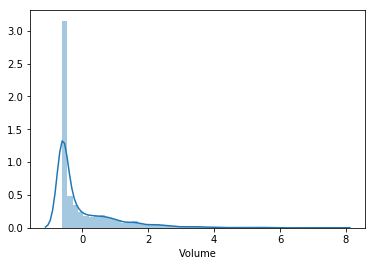

In [15]:
#mean = sum(x) / count(x)
#standard_deviation = sqrt( sum( (x - mean)^2 ) / count(x))
import seaborn as sns
%matplotlib inline
print("mean",dataset_copy["Close"].mean()," std",dataset_copy["Close"].std())
sns.distplot(dataset_copy["Volume"])


In [16]:
# Standardize
from sklearn.preprocessing import StandardScaler
from math import sqrt
# prepare data for standardization
values = dataset[['Close']]
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
	print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
	print(inversed[i])

Mean: 2062.146556, StandardDeviation: 3395.088402
[-0.57098265]
[-0.57081476]
[-0.5709149]
[-0.57031992]
[-0.56998414]
[123.61]
[124.18]
[123.84]
[125.86]
[127.]
